# Data Loading

In [1]:
 # Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
df_fraud = pd.read_csv('card_transdata.csv')
df_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


- Terdapat 1000000 baris dalam dataset credit card fraud
- terdapat 8 kolom yaitu : distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud

# Exploratory Data Analysis (EDA) 

In [3]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


- Semua kolom memiliki 1.000.000 non-null entries, menunjukkan bahwa tidak ada missing values di dalam dataset ini. Setiap entri transaksi memiliki nilai untuk semua kolom.
- Semua kolom bertipe data float64. Kolom-kolom yang semestinya bersifat kategorikal (biner) seperti repeat_retailer, used_chip, used_pin_number, online_order, dan fraud, juga dikodekan sebagai float64.

In [11]:
df_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Interpretasi
- Variabilitas Jarak: Jarak transaksi dari rumah dan dari transaksi terakhir memiliki variasi yang sangat tinggi, yang dapat menjadi indikator penting untuk mendeteksi anomali.
- Rasio Harga Pembelian: Variasi besar dalam rasio harga pembelian terhadap median menunjukkan bahwa transaksi dengan rasio yang sangat tinggi atau rendah mungkin mencurigakan.
- Transaksi Biner: Sebagian besar transaksi terjadi dengan pengecer yang sama, banyak yang menggunakan chip, tetapi sedikit yang menggunakan PIN.
- Transaksi Online: Proporsi yang signifikan dari transaksi adalah pesanan online, yang mungkin lebih rentan terhadap penipuan.
- Kelas Fraud: Hanya sekitar 8.74% dari transaksi yang merupakan fraud, menunjukkan ketidakseimbangan kelas yang perlu diperhatikan dalam pemodelan machine learning.

## Univariate EDA

### Categorical Features

In [5]:
numerical_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']

     jumlah sampel  persentase
1.0         881536        88.2
0.0         118464        11.8


<Axes: title={'center': 'repeat_retailer'}>

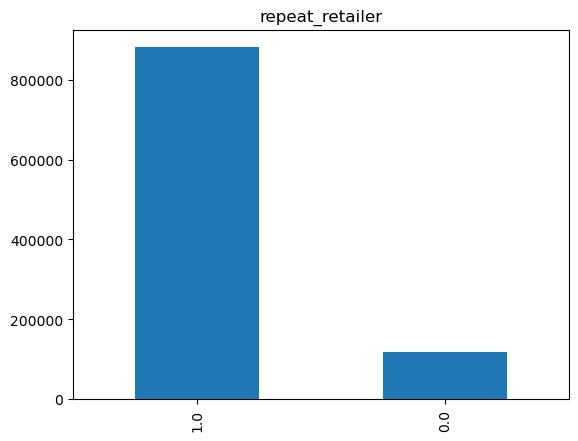

In [7]:
feature = categorical_features[0]
count = df_fraud[feature].value_counts()
percent = 100*df_fraud[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Terdapat 88.2 persen transaksi yang terjadi dari pengecer yang sama 11.8 % dari pengecer yang berbeda

     jumlah sampel  persentase
0.0         649601        65.0
1.0         350399        35.0


<Axes: title={'center': 'used_chip'}>

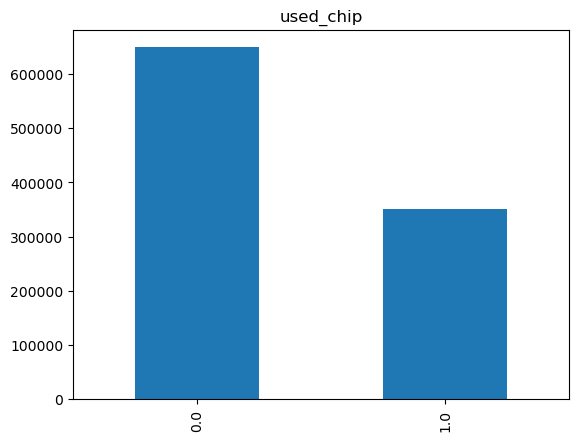

In [16]:
feature = categorical_features[1]
count = df_fraud[feature].value_counts()
percent = 100*df_fraud[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Terdapat 35% transaksi yang mengggunakan chip (kartu kredit)

     jumlah sampel  persentase
0.0         899392        89.9
1.0         100608        10.1


<Axes: title={'center': 'used_pin_number'}>

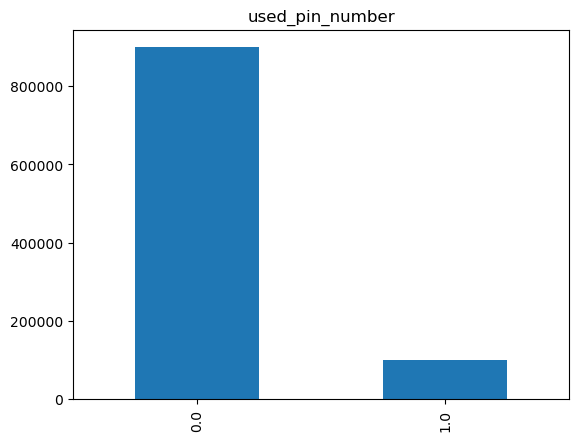

In [17]:
feature = categorical_features[2]
count = df_fraud[feature].value_counts()
percent = 100*df_fraud[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Terdapat 10.1% transaksi yang menggunakan nomor pin 

     jumlah sampel  persentase
1.0         650552        65.1
0.0         349448        34.9


<Axes: title={'center': 'online_order'}>

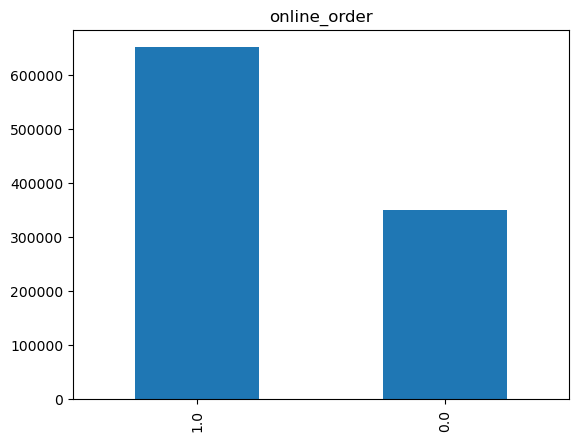

In [18]:
feature = categorical_features[3]
count = df_fraud[feature].value_counts()
percent = 100*df_fraud[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Terdapat 65.1% transaksi tersebut merupakan pesanan online

     jumlah sampel  persentase
0.0         912597        91.3
1.0          87403         8.7


<Axes: title={'center': 'fraud'}>

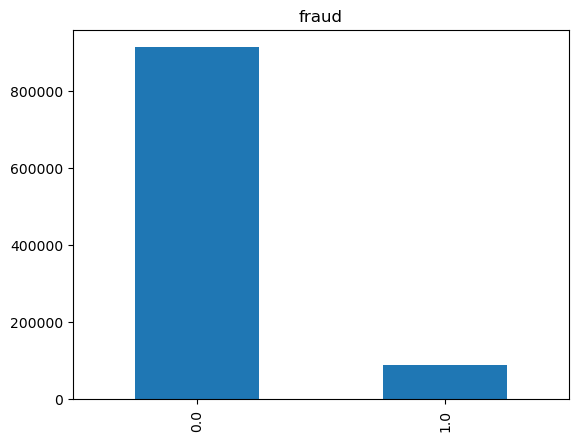

In [19]:
feature = categorical_features[4]
count = df_fraud[feature].value_counts()
percent = 100*df_fraud[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari seluruh data transaksi yang terdapat 8.7% transaksi yang merupakan fraud (penipuan). Ini menandakan bahwa data mengalami ketidakseimbangan data

### Numerical Features

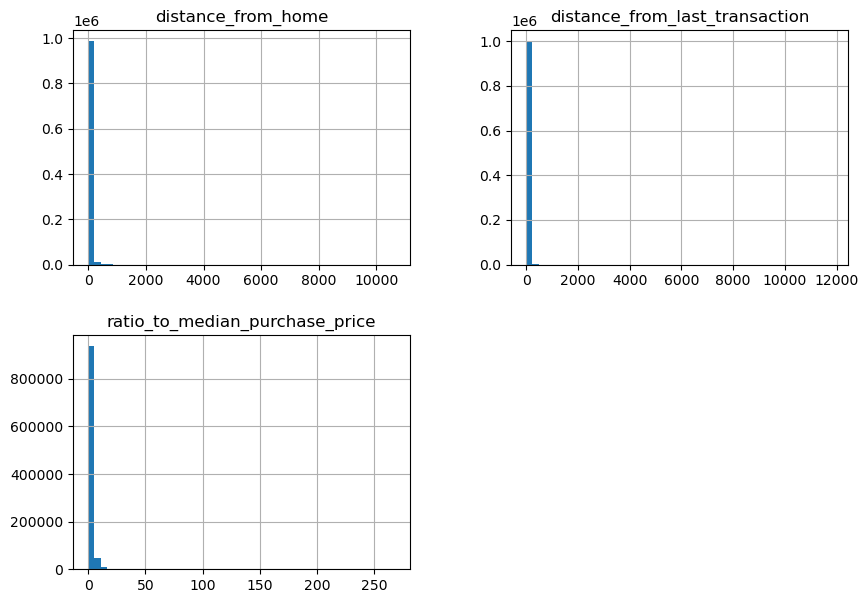

In [25]:
df_fraud[numerical_features].hist(bins=50, figsize=(10,7))
plt.show()

1. Distance from Home
Distribusi: Sebagian besar transaksi terjadi dekat dengan rumah pemilik kartu.
Outliers: Beberapa transaksi terjadi sangat jauh dari rumah, hingga 10,000 km, yang mungkin menunjukkan potensi penipuan.

2. Distance from Last Transaction
Distribusi: Sebagian besar transaksi berikutnya terjadi dekat dengan lokasi transaksi sebelumnya.
Outliers: Ada beberapa jarak yang sangat besar, hingga 12,000 km, yang dapat mengindikasikan transaksi mencurigakan

3. Ratio to Median Purchase Price
Distribusi: Mayoritas transaksi berada di sekitar harga beli rata-rata.
Outliers: Beberapa transaksi memiliki rasio harga yang sangat tinggi, hingga lebih dari 250 kali harga rata-rata, yang mungkin merupakan indikasi penipuan.

## Multivariate EDA

### Categorical Features

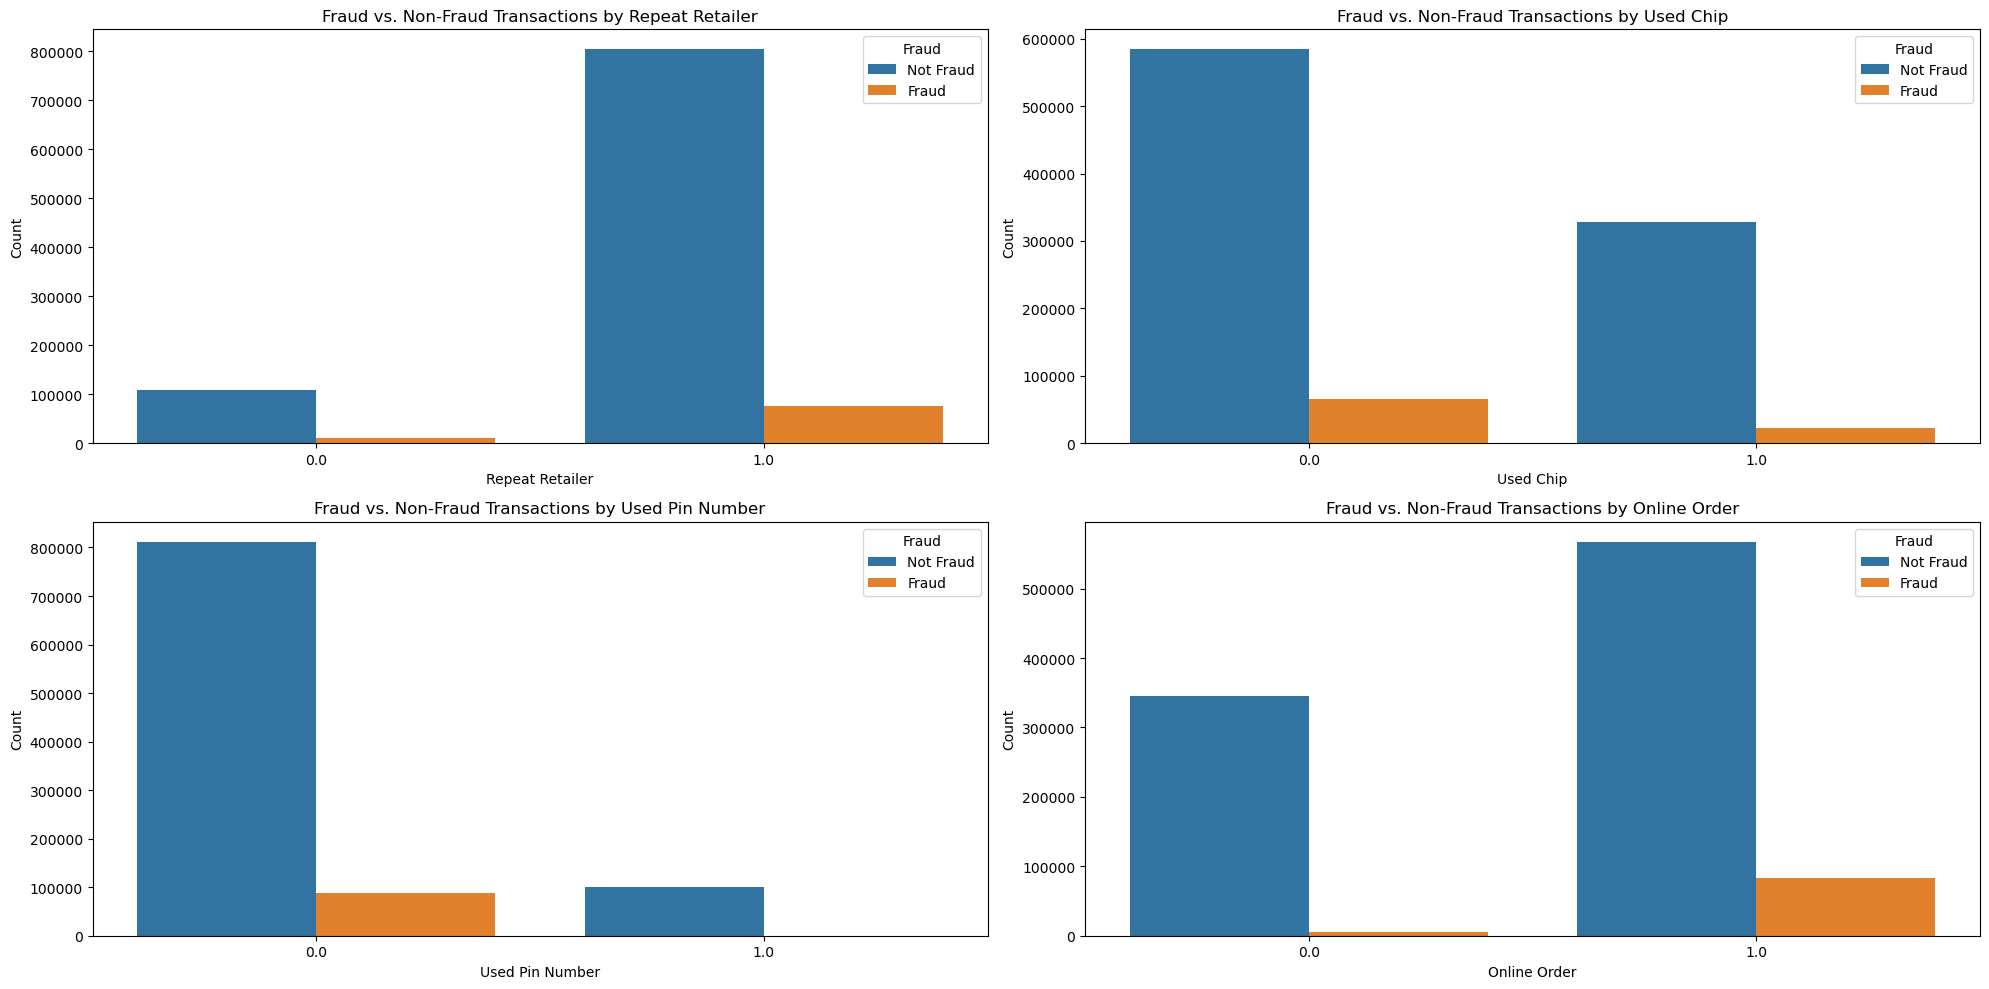

In [12]:
# List of categorical features
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='fraud', data=df_fraud)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.title(f'Fraud vs. Non-Fraud Transactions by {feature.replace("_", " ").title()}')
    plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

**Fraud vs. Non-Fraud Transactions by Repeat Retailer** 

Grafik ini menunjukkan hubungan antara transaksi yang dilakukan di pengecer yang sama dengan kejadian penipuan. Sebagian besar transaksi dilakukan di pengecer yang sama (repeat_retailer = 1.0) baik itu penipuan maupun bukan. Namun, terlihat bahwa penipuan lebih sedikit terjadi pada transaksi yang dilakukan di pengecer yang sama dibandingkan dengan transaksi yang dilakukan di pengecer yang berbeda.

**Fraud vs. Non-Fraud Transactions by Used Chip**

Grafik ini menunjukkan hubungan antara penggunaan chip dalam transaksi dengan kejadian penipuan. Terlihat bahwa lebih banyak transaksi tidak menggunakan chip (used_chip = 0.0) dibandingkan dengan yang menggunakan chip (used_chip = 1.0). Namun, transaksi tanpa chip memiliki jumlah penipuan yang lebih tinggi dibandingkan dengan transaksi yang menggunakan chip.

**Fraud vs. Non-Fraud Transactions by Used Pin Number**

Grafik ini menunjukkan hubungan antara penggunaan nomor PIN dalam transaksi dengan kejadian penipuan. Sebagian besar transaksi tidak menggunakan PIN (used_pin_number = 0.0). Dari data tersebut, terlihat bahwa transaksi yang tidak menggunakan PIN memiliki jumlah penipuan yang lebih tinggi dibandingkan dengan transaksi yang menggunakan PIN (used_pin_number = 1.0).

**Fraud vs. Non-Fraud Transactions by Online Order**

Grafik ini menunjukkan hubungan antara pesanan online dengan kejadian penipuan. Terlihat bahwa sebagian besar transaksi bukan pesanan online (online_order = 0.0). Dari data tersebut, terlihat bahwa penipuan lebih banyak terjadi pada transaksi yang bukan pesanan online dibandingkan dengan transaksi yang merupakan pesanan online.

### Numerical Features

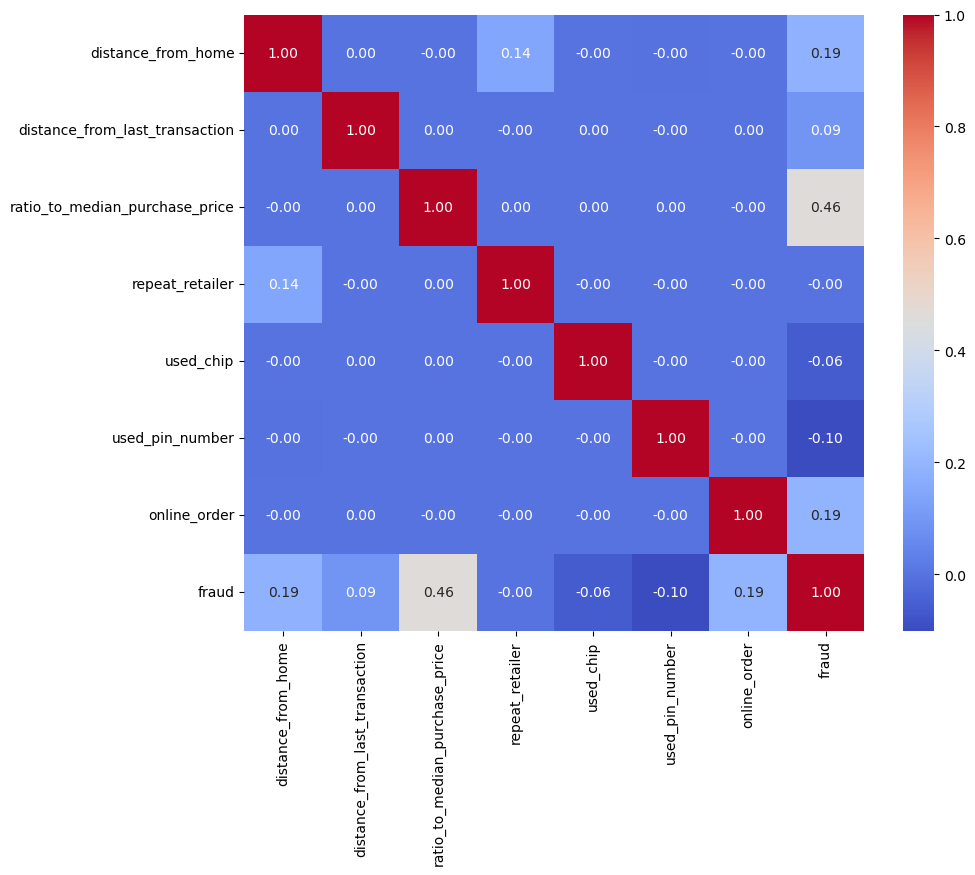

In [5]:
corr = df_fraud.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Fitur seperti ‘distance_from_last_transaction’, ‘ratio_to_median_purchase_price’, dan ‘fraud’ memiliki korelasi yang lebih tinggi, yang bisa menjadi indikator penting dalam mendeteksi transaksi fraud.

# Data Preparation

### Data Normalization

In [6]:
from sklearn.preprocessing import StandardScaler
# Melakukan standarisasi
scaler = StandardScaler()
df_fraud[numerical_features] = scaler.fit_transform(df_fraud[numerical_features])

### Splitting Data

In [7]:
from sklearn.model_selection import train_test_split
X = df_fraud.drop('fraud', axis=1)  # Independent Features
y = df_fraud['fraud']  # Target - Dependent Feature

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

### Handling Imbalanced Data (SMOTENC)

In [69]:
from imblearn.over_sampling import SMOTENC

# Inisialisasi SMOTENC dengan n_neighbors sesuai dengan jumlah sampel minoritas
smotenc = SMOTENC(categorical_features=[3,4,5,6], random_state=42, k_neighbors=7)

In [62]:
# Fungsi untuk melakukan batch resampling
def batch_resample(X, y, batch_size):
    X_resampled = []
    y_resampled = []
    
    for start in range(0, len(X), batch_size):
        end = min(start + batch_size, len(X))
        X_batch, y_batch = X.iloc[start:end], y.iloc[start:end]
        X_batch_resampled, y_batch_resampled = smotenc.fit_resample(X_batch, y_batch)
        X_resampled.append(X_batch_resampled)
        y_resampled.append(y_batch_resampled)
    
    return pd.concat(X_resampled), pd.concat(y_resampled)

In [70]:
# Melakukan resampling dengan batch size yang lebih kecil
batch_size = 1000  # Sesuaikan batch size sesuai dengan kapasitas memori
X_train_resampled, y_train_resampled = batch_resample(X_train, y_train, batch_size)

In [64]:
# Menampilkan hasil resampling
print("Sebelum resampling:")
print(y_train.value_counts())

print("\nSetelah resampling:")
print(pd.Series(y_train_resampled).value_counts())

Sebelum resampling:
0.0    638818
1.0     61182
Name: fraud, dtype: int64

Setelah resampling:
0.0    638818
1.0    638818
Name: fraud, dtype: int64


     jumlah sampel  persentase
0.0         638818        50.0
1.0         638818        50.0


<Axes: title={'center': 'fraud'}>

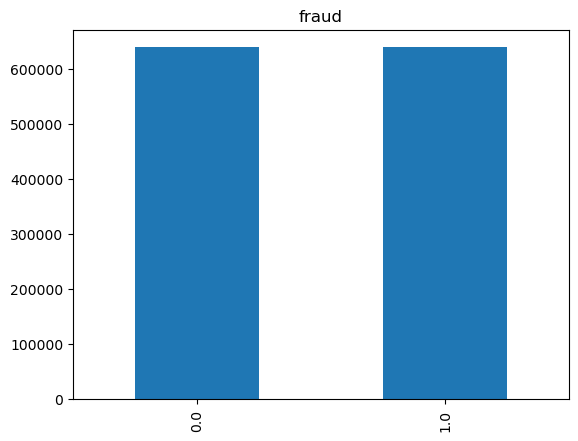

In [65]:
count = y_train_resampled.value_counts()
percent = 100*y_train_resampled.value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='fraud')

# Model Development

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression

In [71]:
# Train a Logistic Regression classifier on the resampled data
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_test_pred = lr_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    accuracy = (y_true == y_pred).mean() * 100
    print(f"Accuracy for {set_name}: {accuracy:.2f}%")
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, "Test Data")

Accuracy for Test Data: 94.47%
Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    273779
         1.0       0.62      0.93      0.75     26221

    accuracy                           0.94    300000
   macro avg       0.81      0.94      0.86    300000
weighted avg       0.96      0.94      0.95    300000

Confusion Matrix for Test Data:
[[259071  14708]
 [  1868  24353]]



Logistic Regression memiliki akurasi yang tinggi (94.47%) dan performa yang baik dalam mendeteksi transaksi non-fraud (precision 0.99, recall 0.95). Namun, performa dalam mendeteksi transaksi fraud lebih rendah dengan precision 0.62 dan recall 0.93. Ini berarti bahwa model ini cenderung memberikan banyak false positives tetapi lebih jarang mengabaikan kasus fraud.

## Random Forest

In [72]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the resampled training dataset to the model
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on test sets
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    accuracy = (y_true == y_pred).mean() * 100
    print(f"Accuracy for {set_name}: {accuracy:.2f}%")
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, "Test Data")

Accuracy for Test Data: 99.76%
Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       0.97      1.00      0.99     26221

    accuracy                           1.00    300000
   macro avg       0.99      1.00      0.99    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix for Test Data:
[[273079    700]
 [     7  26214]]



Random Forest menunjukkan performa yang sangat baik dengan akurasi 99.76%. Model ini hampir sempurna dalam mendeteksi kedua kelas dengan precision, recall, dan f1-score yang tinggi. Ini berarti bahwa model ini sangat efektif dalam membedakan antara transaksi fraud dan non-fraud dengan kesalahan yang sangat kecil.

## Xgboost

In [73]:
import xgboost as xgb

# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on test sets
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    accuracy = (y_true == y_pred).mean() * 100
    print(f"Accuracy for {set_name}: {accuracy:.2f}%")
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, "Test Data")

Accuracy for Test Data: 99.61%
Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       0.96      0.99      0.98     26221

    accuracy                           1.00    300000
   macro avg       0.98      0.99      0.99    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix for Test Data:
[[272773   1006]
 [   167  26054]]



XGBoost juga menunjukkan performa yang sangat baik dengan akurasi 99.61%. Precision dan recall untuk mendeteksi transaksi fraud sedikit lebih rendah dibandingkan Random Forest, tetapi tetap sangat tinggi. Ini berarti bahwa model ini juga sangat efektif dalam mendeteksi transaksi fraud dan non-fraud, dengan sedikit lebih banyak kesalahan dibandingkan Random Forest.

# **Kesimpulan dan Rekomendasi**
## Pemilihan Model Terbaik:
Hasil evaluasi menunjukkan bahwa model **Random Forest** memberikan performa terbaik dengan Accuracy, Precision, Recall, dan F1-Score yang paling tinggi diantara model lainnya. Model **XGBoost** juga memiliki performa sedikit di bawah Random Forest dalam mendeteksi fraud, tetapi masih sangat efektif.